In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data_train = pd.read_excel('Data_Train.xlsx')

In [3]:
data_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
len(data_train)

10683

In [5]:
data_test = pd.read_excel('Test_set.xlsx')

In [6]:
data_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [7]:
len(data_test)

2671

In [8]:
final_data = pd.concat([data_train,data_test],ignore_index=True)

In [9]:
final_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
13353,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [10]:
finalDataCopy = final_data.copy()

In [11]:
finalDataCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [12]:
## Feature engineering
finalDataCopy['Date']  = finalDataCopy['Date_of_Journey'].str.split('/').str[0]
finalDataCopy['Month']  =finalDataCopy['Date_of_Journey'].str.split('/').str[1]
finalDataCopy['Year']  =finalDataCopy['Date_of_Journey'].str.split('/').str[2]

In [13]:
finalDataCopy['Date'] = finalDataCopy['Date'] .astype(int)
finalDataCopy['Month'] = finalDataCopy['Month'] .astype(int)
finalDataCopy['Year'] = finalDataCopy['Year'] .astype(int)

In [14]:
finalDataCopy.drop('Date_of_Journey',axis=1,inplace=True)

In [15]:
finalDataCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int32  
 11  Month            13354 non-null  int32  
 12  Year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(9)
memory usage: 1.2+ MB


In [16]:
## checking the null values
finalDataCopy.isna().sum()

Airline               0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
dtype: int64

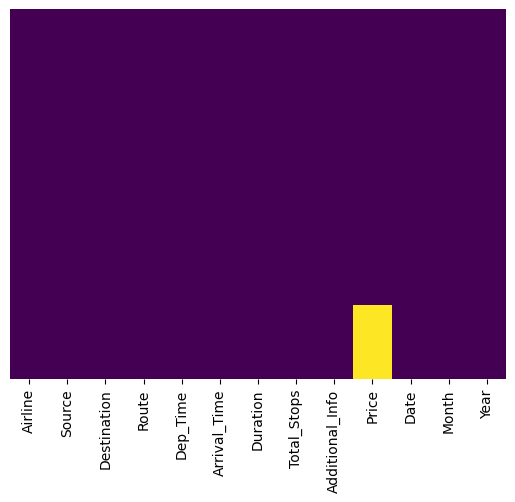

In [17]:
sns.heatmap(finalDataCopy.isna(), yticklabels=False, cbar=False,cmap='viridis')
plt.show()

In [18]:
finalDataCopy['Arrival_Time'] = finalDataCopy['Arrival_Time'].apply(lambda x:x.split(' ')[0])

In [19]:
finalDataCopy['Arrival_Hour'] = finalDataCopy['Arrival_Time'].str.split(':').str[0]
finalDataCopy['Arrival_Min'] = finalDataCopy['Arrival_Time'].str.split(':').str[1]

In [20]:
finalDataCopy.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10


In [21]:
finalDataCopy['Arrival_Hour'] = finalDataCopy['Arrival_Hour'].astype(int)
finalDataCopy['Arrival_Min'] = finalDataCopy['Arrival_Min'].astype(int)

In [22]:
finalDataCopy = finalDataCopy.drop('Arrival_Time',axis=1)

In [23]:
finalDataCopy.head(1)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10


In [24]:
finalDataCopy['Dept_hour']=finalDataCopy['Dep_Time'].str.split(':').str[0]
finalDataCopy['Dept_min']=finalDataCopy['Dep_Time'].str.split(':').str[1]
finalDataCopy['Dept_hour']=finalDataCopy['Dept_hour'].astype(int)
finalDataCopy['Dept_min']=finalDataCopy['Dept_min'].astype(int)
finalDataCopy.drop('Dep_Time',axis=1,inplace=True)

In [25]:
finalDataCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int32  
 9   Month            13354 non-null  int32  
 10  Year             13354 non-null  int32  
 11  Arrival_Hour     13354 non-null  int32  
 12  Arrival_Min      13354 non-null  int32  
 13  Dept_hour        13354 non-null  int32  
 14  Dept_min         13354 non-null  int32  
dtypes: float64(1), int32(7), object(7)
memory usage: 1.2+ MB


In [26]:
finalDataCopy['Total_Stops']=finalDataCopy['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':1})

In [27]:
finalDataCopy.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [28]:
finalDataCopy['duration_hour']=finalDataCopy['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [29]:
finalDataCopy[finalDataCopy['duration_hour']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dept_hour,Dept_min,duration_hour
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2.0,No info,17327.0,6,3,2019,16,55,16,50,5m
13343,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2.0,No info,NaN,12,3,2019,16,55,16,50,5m


In [30]:
finalDataCopy.drop(6474,axis=0,inplace=True)

In [32]:
finalDataCopy.drop(13343,axis=0,inplace=True)

In [34]:
finalDataCopy['duration_hour']=finalDataCopy['duration_hour'].astype('int')

In [36]:
finalDataCopy.drop('Duration',axis=1,inplace=True)

In [38]:
finalDataCopy.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [40]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [42]:
finalDataCopy['Airline']=labelencoder.fit_transform(finalDataCopy['Airline'])
finalDataCopy['Source']=labelencoder.fit_transform(finalDataCopy['Source'])
finalDataCopy['Destination']=labelencoder.fit_transform(finalDataCopy['Destination'])
finalDataCopy['Additional_Info']=labelencoder.fit_transform(finalDataCopy['Additional_Info'])